In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from pandas .plotting import scatter_matrix
%matplotlib inline

In [98]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',na_values="?")

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1,na_values="?")

# extracting  the column names
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [99]:
test_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [100]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
              'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 
              'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [101]:
train_set.shape, test_set.shape

((32560, 15), (16280, 15))

In [102]:
train_set.sample(4,random_state=42 )

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
14160,38,Private,680390,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,20,United-States,<=50K
27047,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
28867,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States,>50K
5667,51,Private,306108,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,>50K


In [103]:
test_set.sample(4,random_state=42 )

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
13633,39,Private,82726,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,40,United-States,<=50K.
1921,20,Private,223811,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,23,United-States,<=50K.
12140,35,Private,111635,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K.
9933,25,Private,121789,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,38,United-States,<=50K.


In [104]:

train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [105]:
pd.DataFrame([train_set.dtypes,test_set.dtypes],index=["train_set","test_set"]).T

,train_set,test_set
age,int64,int64
workclass,object,object
fnlwgt,int64,int64
education,object,object
education_num,int64,int64
marital_status,object,object
occupation,object,object
relationship,object,object
race,object,object
sex,object,object


In [106]:
for i in train_set.columns:
    if train_set[i].dtypes=="object" :
        print(i)
        

workclass
education
marital_status
occupation
relationship
race
sex
native_country
wage_class


In [107]:

train_set.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [108]:
# will? will create issue

train_set.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [109]:
train_set.native_cou                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    ntry.value_counts()

SyntaxError: invalid syntax (2315648373.py, line 1)

In [ ]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [ ]:
train_set.relationship.value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [ ]:
# #yeh dekhne ke liye ki kaunsi category zyada common hai dataset mein.
# Agar dataset imbalanced hai, toh model biased ho sakta hai.
# Feature engineering ya encoding se pehle categorical distribution samajhna zaroori hota hai.

In [ ]:
train_set.workclass.nunique(),train_set.education.nunique(),train_set.marital_status.nunique(),train_set.native_country.nunique()
# # categorical columns ki unique values count karta hai.

# 🔹 Purpose:

# Yeh dekhne ke liye ki kitni unique categories hain har column mein.
# Yeh decide karne ke liye ki feature encoding kaise karein (One-Hot Encoding ya Label Encoding)

(9, 16, 7, 42)

In [ ]:
# Encoding categorical variables (One-Hot Encoding ya Label Encoding)

In [ ]:
X_train = train_set.copy()
X_test = test_set.copy()

In [ ]:
X_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [ ]:
Sample = X_train.append(X_test)
Sample.columns
# Why Was This Done?
# 🔹 1. Data Preprocessing aur Encoding ke liye

# Train aur test set ko alag-alag encode karne se problem ho sakti hai.
# Example: Agar train set mein workclass column ke sirf 7 categories hain, aur test set mein ek naya category hai (e.g., "Without-pay"), toh model issue de sakta hai.
# Isliye, pura dataset ek saath preprocess karna better hota hai.
# 🔹 2. Feature Scaling ke liye

# StandardScaler, MinMaxScaler, RobustScaler ka use karne se pehle poora dataset normalize karna hota hai.
# Agar alag-alag scaling ho toh train aur test sets ke values ka scale mismatch ho sakta hai, jo prediction ko affect karega.
# 🔹 3. Feature Engineering aur Transformation ke liye

# Missing values fill karna, outliers handle karna, feature extraction karne ke liye ek saath data lena useful hota hai.

C:\Users\lalit\AppData\Local\Temp\ipykernel_10172\2024241424.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Sample = X_train.append(X_test)


Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [ ]:

Sample.describe() #Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48840.000000,4.884000e+04,48840.000000,48840.000000,48840.000000,48840.000000
mean,38.643857,1.896657e+05,10.078092,1079.067301,87.505897,40.422400
std,13.710652,1.056048e+05,2.570954,7452.168393,403.012415,12.391697
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175535e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376472e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
X_test["wage_class"] = X_test["wage_class"].str.replace(".", "", regex=False)
#X_test["wage_class"]=X_test["wage_class"].apply[lambd
# ax :x.replace(".","")]

In [ ]:
#  Key Observations from Numerical Data:
# ✅ Age Distribution:

# Mean age ≈ 38.6 years, with a wide range (min = 17, max = 90).
# Most people are between 28 and 48 years (IQR range).
# ✅ fnlwgt (Final Weight):

# Mean ≈ 189,665, but max value is 1,490,400, showing high variance.
# Need to check if scaling or normalization is required.
# ✅ Education (education_num):

# Mean ≈ 10 years of education, median = 10 years.
# Max = 16 years (likely PhD or higher degrees).
# ✅ Capital Gain & Loss:

# High Skewness: Median = 0, but max capital_gain = 99,999 and capital_loss = 4,356.
# Majority of values are zero.
# Consider log transformation to reduce skewness.
# ✅ Hours Per Week:

# Median = 40 hours (typical full-time work).
# Some people work 99 hours per week, which seems like an outlier.

In [ ]:
Sample.describe(include="object")

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,48840,48840,48840,48840,48840,48840,48840,48840,48840
unique,9,16,7,15,6,5,2,42,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33905,15784,22379,6172,19716,41761,32648,43830,24719


In [ ]:
#  Key Observations from Categorical Data:
# ✅ Workclass:

# 9 unique categories, but Private dominates (33,905 out of 48,840).
# Government jobs (Federal-gov, Local-gov, State-gov) are fewer.
# ✅ Education:

# HS-grad is most common (15,784 people).
# Higher education (Bachelors, Masters, Doctorate) is relatively lower.
# ✅ Marital Status:

# Married-civ-spouse dominates (22,379 people).
# Never-married, Divorced, and Widowed groups are significant too.
# ✅ Occupation:

# 15 categories in total.
# Prof-specialty (like doctors, engineers) is the most common occupation (6,172 people).
# ✅ Race & Gender Distribution:

# White race dominates (41,761 people).
# Male representation is higher (32,648 males vs. fewer females).
# ✅ Native Country:

# 42 unique countries, but USA dominates (43,830 people).
# Very few from other countries (like India, Japan, Canada).
# ✅ Wage Class (Income >50K or <=50K):

# <=50K category is most common (24,719 people).
# Possible class imbalance, meaning more people earn ≤50K than >50K.

In [ ]:
# Final EDA Insights & Next Steps
# 📌 1. Data Imbalance:

# Wage class (<=50K is dominant) → Consider balancing techniques (oversampling or undersampling).
# 📌 2. Outliers in Numerical Features:

# capital_gain and capital_loss are highly skewed → Apply log transformation.
# hours_per_week has extreme values (some working 99 hours).
# 📌 3. Encoding Categorical Variables:

# One-Hot Encoding (for workclass, education, occupation, etc.).
# Label Encoding (for wage_class, sex).
# 📌 4. Feature Engineering Ideas:

# Create a new feature combining capital_gain and capital_loss.
# Group education levels into broader categories (e.g., Low, Medium, High).

In [ ]:
# Feature	       Data Type	                   Unique Values	Encoding Method	    Why?
# workclass	   Categorical (Nominal)	     9           	One-Hot Encoding	No order among categories
# education	    Categorical (Nominal)	     16	            One-Hot Encoding	No order among categories
# marital_status	Categorical (Nominal)	 7	            One-Hot Encoding	No order among categories
# occupation	 Categorical (Nominal)	    15	            One-Hot Encoding	No order among categories
# relationship	Categorical (Nominal)    6               One-Hot Encoding	No order among categories
# race	Categorical (Nominal)	         5	            One-Hot Encoding	No order among categories
# native_country	Categorical (Nominal)	42	           One-Hot Encoding	   Too many categories, but needed for country-based analysis
# wage_class	Categorical (Binary)	    2	           Label Encoding	   Only two categories, 0 or 1 is enough
# sex	Categorical (Binary)	            2	          Label Encoding	   Only two categories, 0 or 1 is enough


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import pandas as pd

def plot_distribution(dataset, cols=5, width=20, height=30, hspace=0.2, wspace=0.5):
    plt.style.use('fivethirtyeight')  # Use a specific style for better visuals
    fig = plt.figure(figsize=(width, height))  # Create a figure
    fig.subplots_adjust(wspace=wspace, hspace=hspace)  # Adjust subplot spacing

    rows = math.ceil(dataset.shape[1] / cols)  # Calculate number of rows

    # Iterate over columns to plot distributions
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)  # Create subplot for each column
        ax.set_title(column)

        # Check if column is categorical
        if pd.api.types.is_object_dtype(dataset[column]):  
            g = sns.countplot(y=dataset[column], ax=ax)  # Assign plot to ax
            substrings = [s.get_text()[:18] for s in ax.get_yticklabels()]
            ax.set_yticklabels(substrings)  # Set y-tick labels
            ax.set_xticklabels(ax.get_xticks(), rotation=25)  # Rotate x-ticks
        else:
            sns.histplot(dataset[column], kde=True, ax=ax)  # Assign histogram to ax
            ax.set_xticklabels(ax.get_xticks(), rotation=25)  # Rotate x-ticks

    plt.show()  # Show all subplots


C:\Users\lalit\AppData\Local\Temp\ipykernel_10172\1573956595.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=25)  # Rotate x-ticks
C:\Users\lalit\AppData\Local\Temp\ipykernel_10172\1573956595.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=25)  # Rotate x-ticks
C:\Users\lalit\AppData\Local\Temp\ipykernel_10172\1573956595.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=25)  # Rotate x-ticks
C:\Users\lalit\AppData\Local\Temp\ipykernel_10172\1573956595.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=25)  # Rotate x-ticks
C:\Users\lalit\AppData\Local\Temp\ipykernel_10172\1573956595.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_

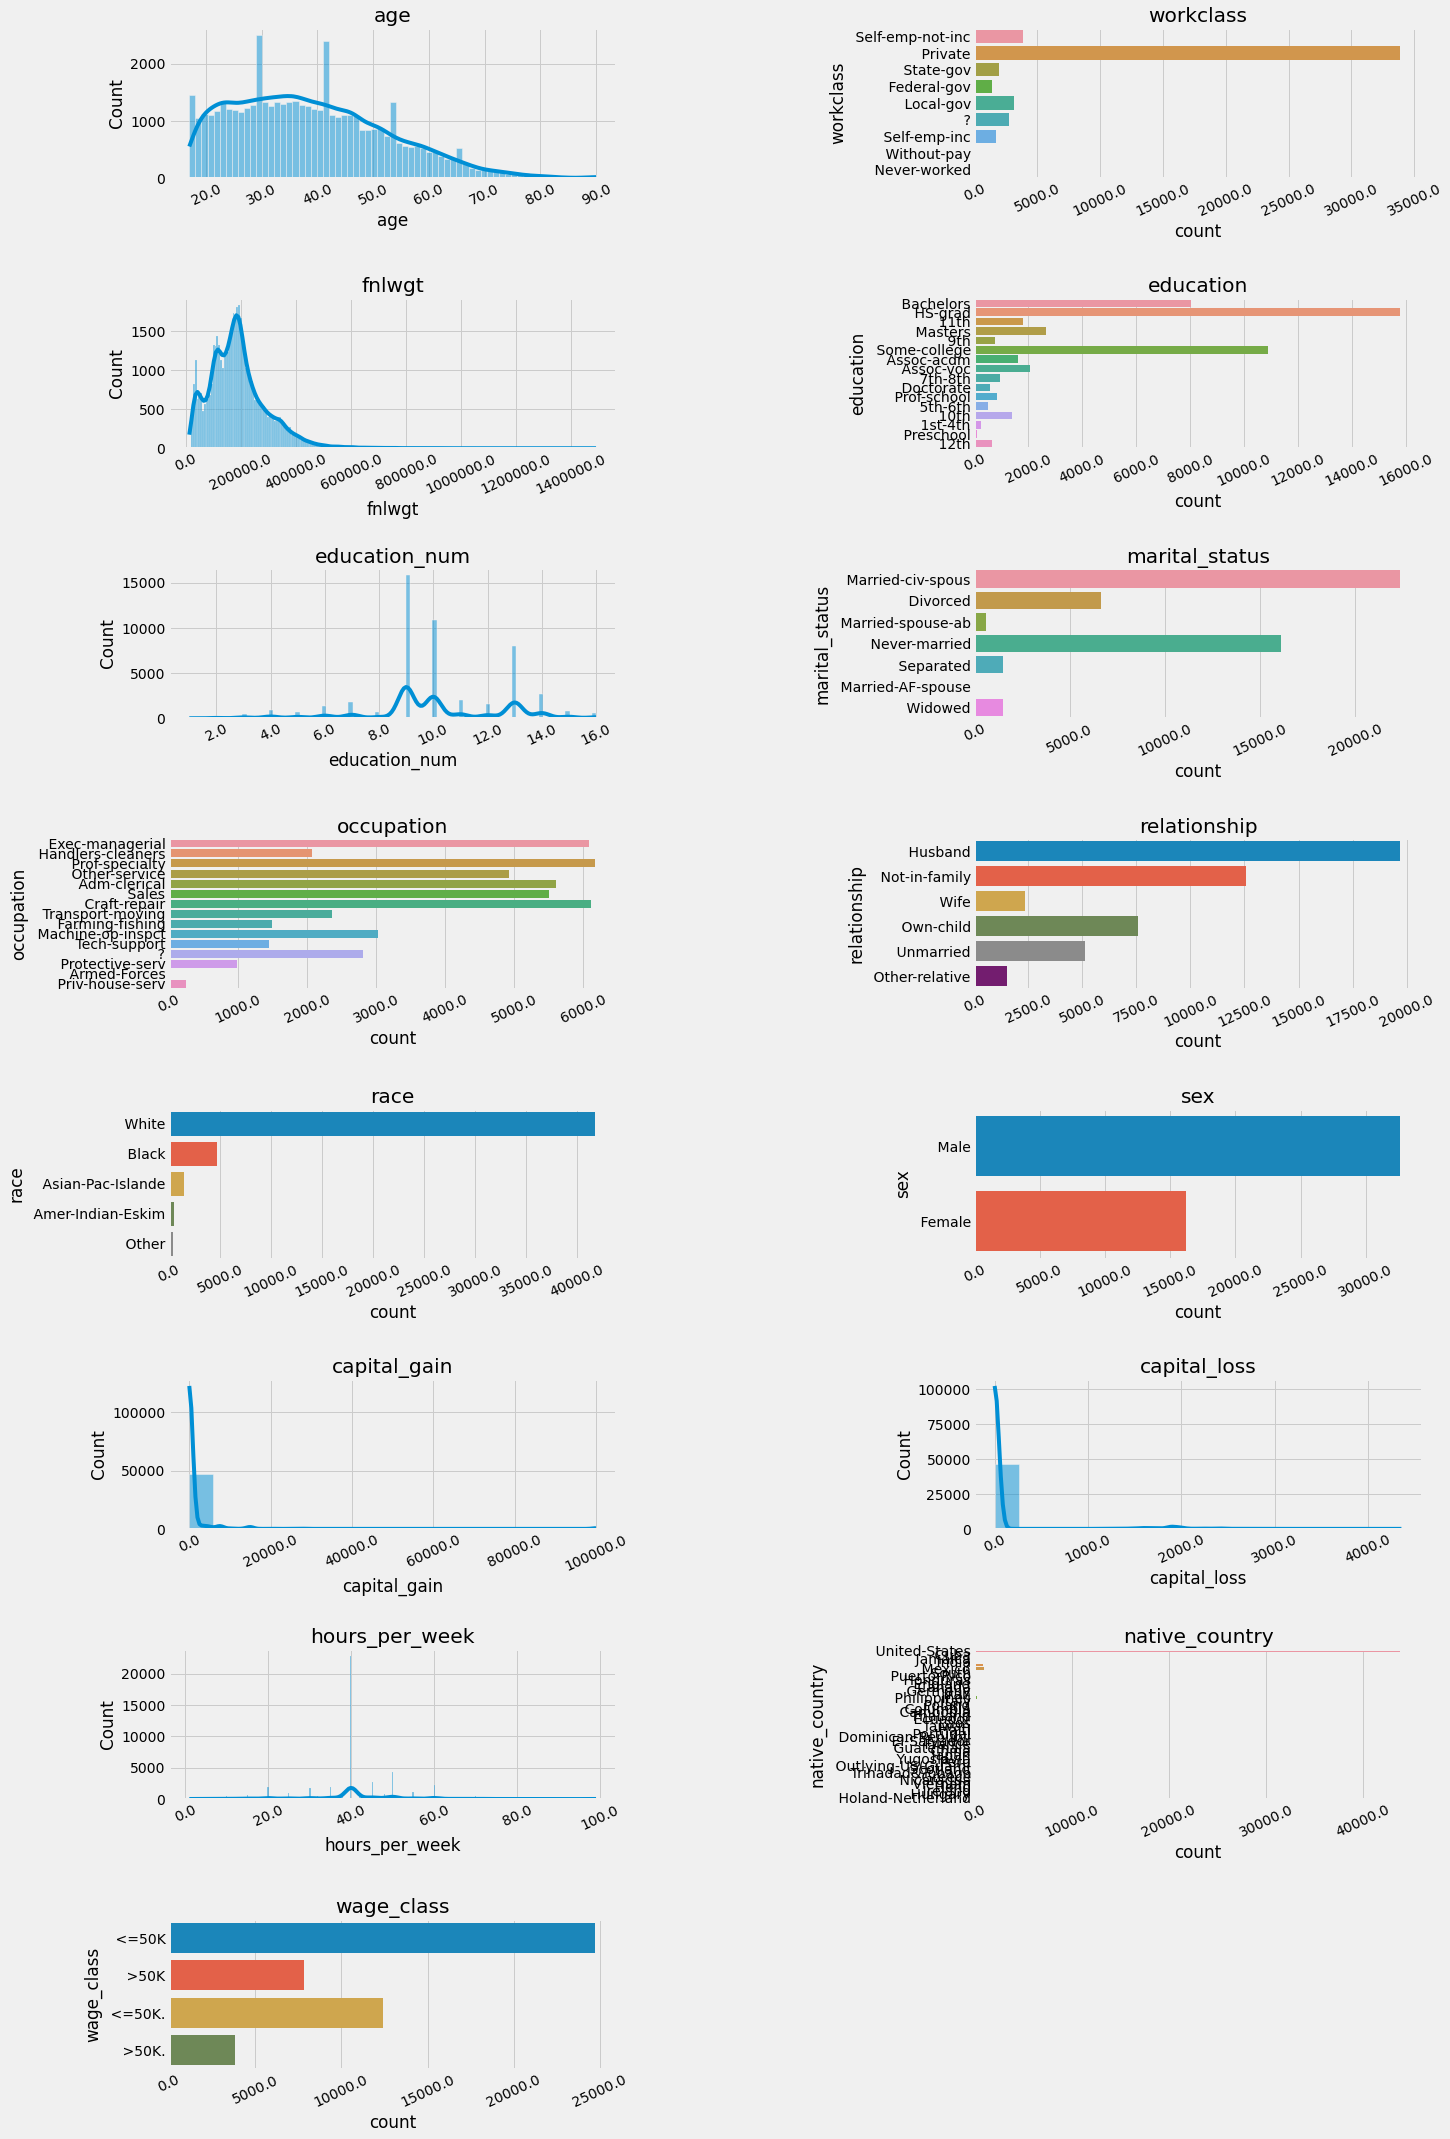

In [ ]:
#  creating  columnwise histograms
plot_distribution(Sample, cols=2, width=20, height=35, hspace=0.8, wspace=0.8)

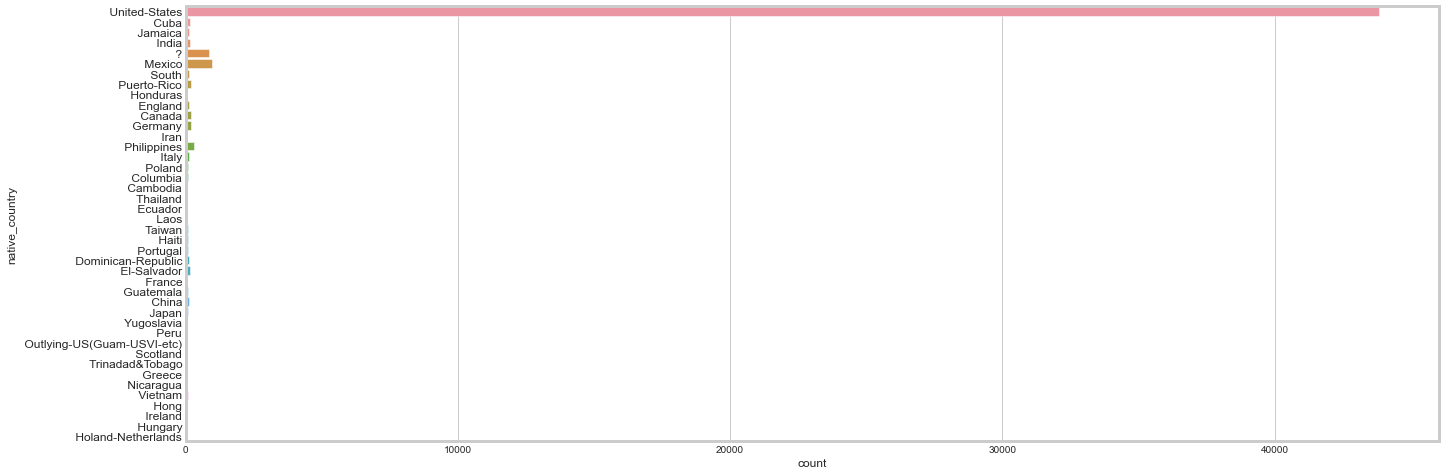

In [ ]:
sns.set_style('whitegrid') #Use matplotlib style settings from a style specification.
%matplotlib inline
plt.figure(figsize=(20,8)) #Create a new figure
g = sns.countplot(y='native_country',data=Sample) # plotting the counts for native country

g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 12) # Set the y-tick labels with list of strings labels.
plt.show()

In [ ]:
# Replacing the '?' in the dataset with NaN
# Replacing the '?' in the dataset with NaN
train_set = train_set.apply(lambda x : x.replace('?', np.nan))
test_set = test_set.apply(lambda x : x.replace('?', np.nan))

In [110]:
#what is imputation approach here
train_set.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [ ]:
# checking the frequency of NaN in different columns in the training set
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [ ]:
# checking the frequency of NaN in different columns in the test set
test_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [ ]:
# Dropping the NaN values from training and test sets
test_set.dropna(inplace=True)
train_set.dropna(inplace=True)

In [ ]:
# checking the training and test datsets after dropping the NaN values
test_set.isnull().sum(),train_set.isnull().sum()

(age               0
 workclass         0
 fnlwgt            0
 education         0
 education_num     0
 marital_status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital_gain      0
 capital_loss      0
 hours_per_week    0
 native_country    0
 wage_class        0
 dtype: int64,
 age               0
 workclass         0
 fnlwgt            0
 education         0
 education_num     0
 marital_status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital_gain      0
 capital_loss      0
 hours_per_week    0
 native_country    0
 wage_class        0
 dtype: int64)

In [ ]:
# function to encode sex
dict_sex = {}
count = 0
for i in X_train.sex.unique()  :
	dict_sex[i] = count
	count += 1

dict_sex
 
 

{' Male': 0, ' Female': 1}

In [ ]:
# function to encode workclass
dict_workclass ={}
count =0
for i  in X_train.workclass.unique():
    dict_workclass[i] =count
    count= count+1

dict_workclass
 
   

{' Self-emp-not-inc': 0,
 ' Private': 1,
 ' State-gov': 2,
 ' Federal-gov': 3,
 ' Local-gov': 4,
 ' ?': 5,
 ' Self-emp-inc': 6,
 ' Without-pay': 7,
 ' Never-worked': 8}

In [ ]:
# function to encode Education
dict_education = {}
count = 0
for i in X_train.education.unique():
    dict_education[i] = count
    count +=1
    
dict_education

{' Bachelors': 0,
 ' HS-grad': 1,
 ' 11th': 2,
 ' Masters': 3,
 ' 9th': 4,
 ' Some-college': 5,
 ' Assoc-acdm': 6,
 ' Assoc-voc': 7,
 ' 7th-8th': 8,
 ' Doctorate': 9,
 ' Prof-school': 10,
 ' 5th-6th': 11,
 ' 10th': 12,
 ' 1st-4th': 13,
 ' Preschool': 14,
 ' 12th': 15}

In [ ]:
# function to encode Marital Status
dict_marital_status = {}
count = 0
for i in X_train.marital_status.unique():
    dict_marital_status[i] = count
    count +=1
    
dict_marital_status

{' Married-civ-spouse': 0,
 ' Divorced': 1,
 ' Married-spouse-absent': 2,
 ' Never-married': 3,
 ' Separated': 4,
 ' Married-AF-spouse': 5,
 ' Widowed': 6}

In [ ]:
# function to encode Occupation
dict_occupation = {}
count = 0
for i in X_train.occupation.unique():
    dict_occupation[i] = count
    count +=1
    
dict_occupation

{' Exec-managerial': 0,
 ' Handlers-cleaners': 1,
 ' Prof-specialty': 2,
 ' Other-service': 3,
 ' Adm-clerical': 4,
 ' Sales': 5,
 ' Craft-repair': 6,
 ' Transport-moving': 7,
 ' Farming-fishing': 8,
 ' Machine-op-inspct': 9,
 ' Tech-support': 10,
 ' ?': 11,
 ' Protective-serv': 12,
 ' Armed-Forces': 13,
 ' Priv-house-serv': 14}

In [ ]:
   
# function to encode Relationship
dict_relationship = {}
count = 0
for i in X_train.relationship.unique():
    dict_relationship[i] = count
    count +=1
    
dict_relationship

{' Husband': 0,
 ' Not-in-family': 1,
 ' Wife': 2,
 ' Own-child': 3,
 ' Unmarried': 4,
 ' Other-relative': 5}

In [ ]:
# function to encode Race
dict_race = {}
count = 0
for i in X_train.race.unique():
    dict_race[i] = count
    count +=1
    
dict_race

{' White': 0,
 ' Black': 1,
 ' Asian-Pac-Islander': 2,
 ' Amer-Indian-Eskimo': 3,
 ' Other': 4}

In [ ]:
# function to encode Native Country
dict_native_country ={}
count = 0
for i in X_train.native_country.unique():
    dict_native_country[i] = count
    count +=1
    
dict_native_country

{' United-States': 0,
 ' Cuba': 1,
 ' Jamaica': 2,
 ' India': 3,
 ' ?': 4,
 ' Mexico': 5,
 ' South': 6,
 ' Puerto-Rico': 7,
 ' Honduras': 8,
 ' England': 9,
 ' Canada': 10,
 ' Germany': 11,
 ' Iran': 12,
 ' Philippines': 13,
 ' Italy': 14,
 ' Poland': 15,
 ' Columbia': 16,
 ' Cambodia': 17,
 ' Thailand': 18,
 ' Ecuador': 19,
 ' Laos': 20,
 ' Taiwan': 21,
 ' Haiti': 22,
 ' Portugal': 23,
 ' Dominican-Republic': 24,
 ' El-Salvador': 25,
 ' France': 26,
 ' Guatemala': 27,
 ' China': 28,
 ' Japan': 29,
 ' Yugoslavia': 30,
 ' Peru': 31,
 ' Outlying-US(Guam-USVI-etc)': 32,
 ' Scotland': 33,
 ' Trinadad&Tobago': 34,
 ' Greece': 35,
 ' Nicaragua': 36,
 ' Vietnam': 37,
 ' Hong': 38,
 ' Ireland': 39,
 ' Hungary': 40,
 ' Holand-Netherlands': 41}

In [ ]:
X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
# function to encode Wage Class
dict_wage_class = {}
count = 0
for i in X_train.wage_class.unique():
    dict_wage_class[i] = count
    count +=1
    
dict_wage_class

{' <=50K': 0, ' >50K': 1}

In [ ]:

# Mapping the categorical values against the corresponding numeric values for the respective columns for training dataset 

X_train['sex'] = X_train['sex'].map(dict_sex)
X_train['education'] = X_train['education'].map(dict_education)
X_train['wage_class'] = X_train['wage_class'].map(dict_wage_class)
X_train['native_country'] = X_train['native_country'].map(dict_native_country)
X_train['race'] = X_train['race'].map(dict_race)
X_train['occupation']=X_train['occupation'].map(dict_occupation)
X_train['marital_status'] = X_train['marital_status'].map(dict_marital_status)
X_train['workclass'] = X_train['workclass'].map(dict_workclass)
X_train['relationship'] = X_train['relationship'].map(dict_relationship)

In [ ]:
# looking at the data after converting categorical columns to numerical ones
X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,50,0,83311,0,13,0,0,0,0,0,0,0,13,0,0
1,38,1,215646,1,9,1,1,1,0,0,0,0,40,0,0
2,53,1,234721,2,7,0,1,0,1,0,0,0,40,0,0
3,28,1,338409,0,13,0,2,2,1,1,0,0,40,1,0
4,37,1,284582,3,14,0,0,2,0,1,0,0,40,0,0


In [ ]:
# checking the training set for null values
X_train.isnull().sum()  

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [ ]:
X_train.describe() #Generate descriptive statistics that summarize the central tendency,dispersion and shape of a dataset's distribution, excluding ``NaN`` values.

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.614619,1.897818e+05,3.424570,10.080590,1.458784,4.734275,1.392291,0.221714,0.330805,1077.615172,87.306511,40.437469,1.290356,0.240817
std,13.640642,1.490557,1.055498e+05,3.453582,2.572709,1.622263,3.329518,1.535159,0.627357,0.470510,7385.402999,402.966116,12.347618,5.045446,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,1.000000,1.178315e+05,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,1.000000,1.783630e+05,2.000000,10.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,48.000000,1.000000,2.370545e+05,5.000000,12.000000,3.000000,7.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [ ]:
# Printing the counts of the individual values in the 'wage_class' column
print(X_train.wage_class.value_counts())
print(X_test.wage_class.value_counts())

0    24719
1     7841
Name: wage_class, dtype: int64
 <=50K    12434
 >50K      3846
Name: wage_class, dtype: int64


In [ ]:
# looking at the test data before converting categorical columns to numerical ones
X_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [ ]:
# Mapping the categorical values against the corresponding numeric values for the respective columns for test dataset
X_test['sex'] = X_test['sex'].map(dict_sex)
X_test['education'] = X_test['education'].map(dict_education)
X_test['wage_class'] = X_test['wage_class'].map(dict_wage_class)
X_test['native_country'] = X_test['native_country'].map(dict_native_country)
X_test['race'] = X_test['race'].map(dict_race)
X_test['occupation']=X_test['occupation'].map(dict_occupation)
X_test['marital_status'] = X_test['marital_status'].map(dict_marital_status)
X_test['workclass'] = X_test['workclass'].map(dict_workclass)
X_test['relationship'] = X_test['relationship'].map(dict_relationship)

In [ ]:
# looking at the test data after converting categorical columns to numerical ones
X_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,38,1,89814,1,9,0,8,0,0,0,0,0,50,0,0
1,28,4,336951,6,12,0,12,0,0,0,0,0,40,0,1
2,44,1,160323,5,10,0,9,0,1,0,7688,0,40,0,1
3,18,5,103497,5,10,3,11,3,0,1,0,0,30,0,0
4,34,1,198693,12,6,3,3,1,0,0,0,0,30,0,0


In [ ]:
dict_wage_class

{' <=50K': 0, ' >50K': 1}

In [ ]:
X_test.describe()  #Generate descriptive statistics that summarize the central tendency,dispersion and shape of a dataset's distribution, excluding ``NaN`` values.

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
count,16280.000000,16280.00000,1.628000e+04,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.00000,16280.000000,16280.00000,16280.000000,16280.000000,16280.000000,16280.000000
mean,38.768305,1.62930,1.894334e+05,3.387039,10.073096,1.483354,4.791216,1.393182,0.21726,0.332985,1081.97156,87.904668,40.392260,1.241216,0.236241
std,13.849192,1.50992,1.057177e+05,3.440813,2.567511,1.633460,3.375522,1.534425,0.62222,0.471296,7584.16416,403.117078,12.479715,4.942061,0.424785
min,17.000000,0.00000,1.349200e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,1.00000,1.167162e+05,1.000000,9.000000,0.000000,2.000000,0.000000,0.00000,0.000000,0.00000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,1.00000,1.778295e+05,2.000000,10.000000,1.000000,4.000000,1.000000,0.00000,0.000000,0.00000,0.000000,40.000000,0.000000,0.000000
75%,48.000000,1.00000,2.383840e+05,5.000000,12.000000,3.000000,7.000000,3.000000,0.00000,1.000000,0.00000,0.000000,45.000000,0.000000,0.000000
max,90.000000,8.00000,1.490400e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.00000,1.000000,99999.00000,3770.000000,99.000000,40.000000,1.000000


In [ ]:
#checking the missing values
print("Train wage_class unique values:", X_train.wage_class.unique())
print("Test wage_class unique values:", X_test.wage_class.unique())

Train wage_class unique values: [0 1]
Test wage_class unique values: [0 1]


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

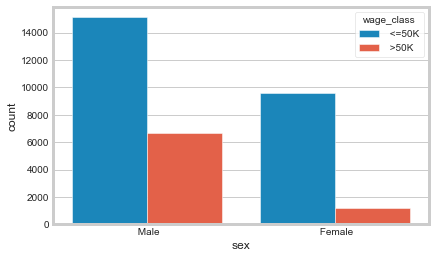

In [ ]:
# Annual Income Data Analysis using Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))
sns.set_style("whitegrid")
%matplotlib inline
sns.countplot("sex",data=train_set,hue ="wage_class")  

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


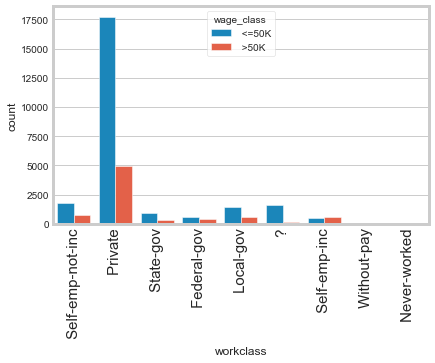

In [ ]:
g = sns.countplot('workclass',data=train_set,hue='wage_class') # a countplot based on the workclass column
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 15)
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


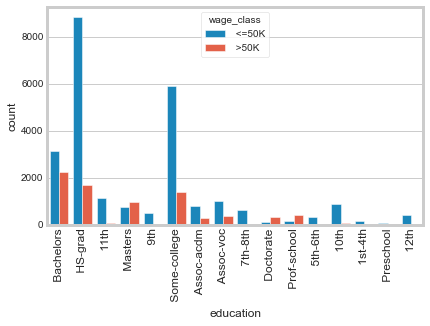

In [ ]:
g = sns.countplot('education',data=train_set,hue='wage_class') # a countplot based on the Education column
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 12)
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


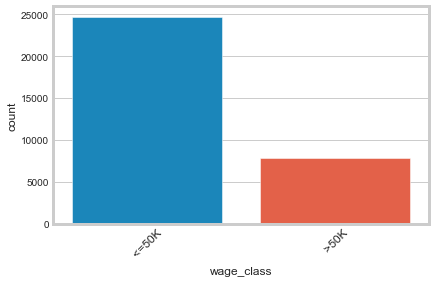

In [ ]:
g = sns.countplot('wage_class',data=train_set) # a countplot based on the wage class column
g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 12)
plt.show()

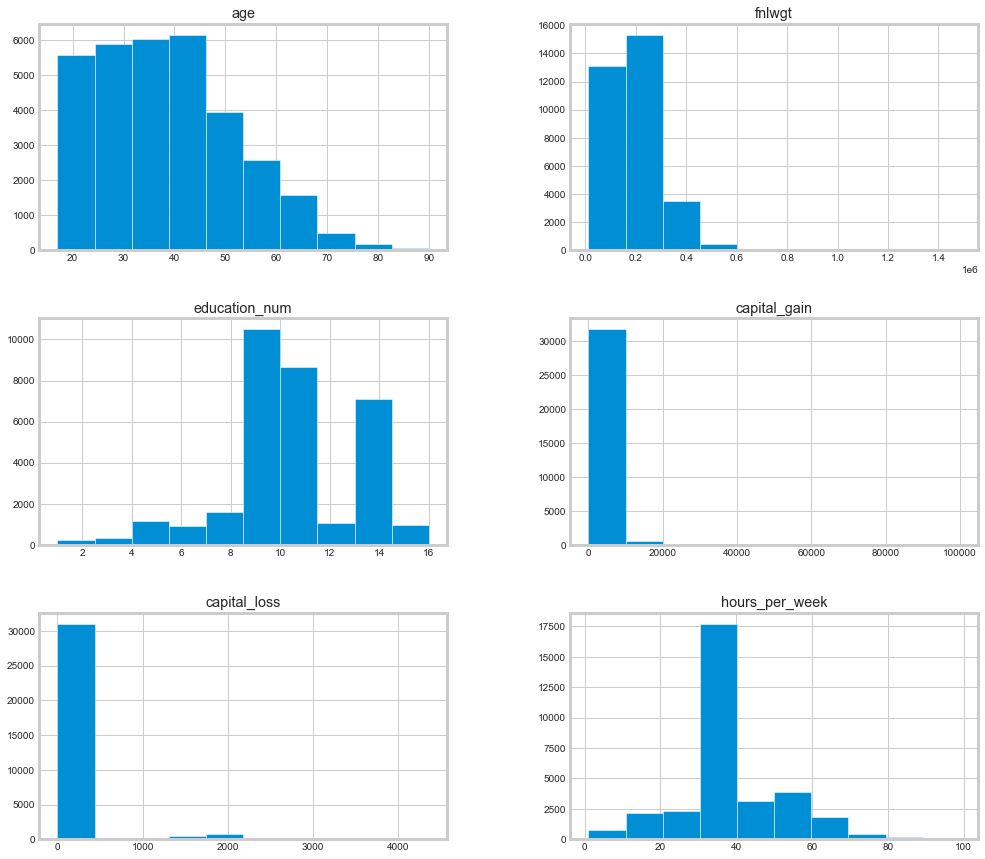

In [ ]:
pd.DataFrame.hist(train_set,figsize = [15,15])
plt.show()